COMP647 Assignment 2
Student Name: Joyce Lee
Student ID: 1164049

In [226]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame
pd.set_option('display.max_rows', None)

Load Data from a CSV

In [227]:
df = pd.read_csv('data/telco_customer_churn.csv')

Display the first 5 rows of the DataFrame to understand its structure.

In [228]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Display the number of rows and columns in the DataFrame.

In [229]:
df.shape

(7043, 33)

Display information about the DataFrame, including data types and non-null counts. 

Noted "Total Charges" is classified as object datatype, need to investigate further.

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Summary statistics for numerical columns in the DataFrame.


In [231]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Count,7043.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Zip Code,7043.0,93521.964646,1865.794555,90001.000000,92102.000000,93552.000000,95351.000000,96161.000000
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
Churn Score,7043.0,58.699418,21.525131,5.000000,40.000000,61.000000,75.000000,100.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


# 1. Handle duplicates

In [232]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [233]:
#check for duplicates in each column and print the count of duplicates
for column in df.columns:
    duplicate_count = df[column].duplicated().sum()
    print(f"Column '{column}' has {duplicate_count} duplicates.")

Column 'CustomerID' has 0 duplicates.
Column 'Count' has 7042 duplicates.
Column 'Country' has 7042 duplicates.
Column 'State' has 7042 duplicates.
Column 'City' has 5914 duplicates.
Column 'Zip Code' has 5391 duplicates.
Column 'Lat Long' has 5391 duplicates.
Column 'Latitude' has 5391 duplicates.
Column 'Longitude' has 5392 duplicates.
Column 'Gender' has 7041 duplicates.
Column 'Senior Citizen' has 7041 duplicates.
Column 'Partner' has 7041 duplicates.
Column 'Dependents' has 7041 duplicates.
Column 'Tenure Months' has 6970 duplicates.
Column 'Phone Service' has 7041 duplicates.
Column 'Multiple Lines' has 7040 duplicates.
Column 'Internet Service' has 7040 duplicates.
Column 'Online Security' has 7040 duplicates.
Column 'Online Backup' has 7040 duplicates.
Column 'Device Protection' has 7040 duplicates.
Column 'Tech Support' has 7040 duplicates.
Column 'Streaming TV' has 7040 duplicates.
Column 'Streaming Movies' has 7040 duplicates.
Column 'Contract' has 7040 duplicates.
Column 'P

In [234]:
#check for duplicates by multiple columns
duplicate_rows = df[df.duplicated(subset=['Monthly Charges', 'Tenure Months', 'City', 'Gender'], keep=False)]

duplicate_rows.shape

(2, 33)

In [235]:
duplicate_rows.sort_values('Monthly Charges').head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
1483,6424-ELEYH,1,United States,California,Lebec,93243,"34.845861, -118.885163",34.845861,-118.885163,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.75,229.5,Yes,1,65,3972,Attitude of service provider
2367,2800-VEQXM,1,United States,California,Lebec,93243,"34.845861, -118.885163",34.845861,-118.885163,Female,No,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,74.75,238.1,No,0,21,3319,NaN


The above two records seem to be different/independent, therefore there are no duplicates found in this dataset.

# 2. Handle irrelevant data

In [236]:
#find columns where all values are the same-constant features
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_columns)

Constant columns: ['Count', 'Country', 'State']


In [237]:
#remove constant columns
df_no_constant_cols = df.drop(columns=constant_columns)

In [238]:
#columns with mostly missing values
threshold = 0  
print(f"total records: {df.shape[0]}")
for column in df.columns:
    missing_count = df[column].isnull().sum()

    #if data is object type, also check for empty strings
    if df[column].dtype == 'object':
        pseudo_missing = df[column].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
        missing_count += pseudo_missing

    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column '{column}' has {missing_count} missing values ({missing_ratio:.2f}%)")

total records: 7043
Column 'Total Charges' has 11 missing values (0.16%)
Column 'Churn Reason' has 5174 missing values (73.46%)


The column "churn reason" has not been removed because those 5174 missing values represent customers who did not churn.

The column "Total charges" will be handled in the next section.

# 3. Handle missing values

In [239]:
#display dataframe with missing values
df_missing = df[df.isnull().any(axis=1)]
df_missing.shape

(5174, 33)

In [240]:
df_missing.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


"Total charges" is classified as object data type which seems not quite right. After checking, there were a few rows containing empty string, need to transform them into float like "monthly charges".

In [241]:
#transform "Total charges" to numerical
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [242]:
#identify numerical columns and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score',
       'CLTV'],
      dtype='object')
Categorical columns: Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Reason'],
      dtype='object')


In [243]:
#get the list of columns with missing values for numerical columns
missing_numerical_cols = df[numerical_cols].isnull().any()
missing_numerical_cols = missing_numerical_cols[missing_numerical_cols].index
print("Numerical columns with missing values:", missing_numerical_cols.tolist())

Numerical columns with missing values: ['Total Charges']


After checking the dataset, the missing value rows of "total charges" are all "Tenure Months"=0, so it should be logical to fill in 0.

In [244]:
#for Total Charges, fill missing values with 0 as tenure months is 0
missing_before = df['Total Charges'].isnull().sum()
df.loc[df['Tenure Months'] == 0 & df['Total Charges'].isnull(), 'Total Charges'] = 0
missing_after = df['Total Charges'].isnull().sum()

print(f"Missing values in 'Total Charges' before: {missing_before}, after: {missing_after}")

Missing values in 'Total Charges' before: 11, after: 0


In [245]:
#get the list of columns with missing values for categorical columns
missing_categorical_cols = df[categorical_cols].isnull().any()
print(missing_categorical_cols)
missing_categorical_cols = missing_categorical_cols[missing_categorical_cols].index
print("Categorical columns with missing values:", missing_categorical_cols.tolist())

CustomerID           False
Country              False
State                False
City                 False
Lat Long             False
Gender               False
Senior Citizen       False
Partner              False
Dependents           False
Phone Service        False
Multiple Lines       False
Internet Service     False
Online Security      False
Online Backup        False
Device Protection    False
Tech Support         False
Streaming TV         False
Streaming Movies     False
Contract             False
Paperless Billing    False
Payment Method       False
Churn Label          False
Churn Reason          True
dtype: bool
Categorical columns with missing values: ['Churn Reason']


not dropping the rows with missing values in the 'Churn Reason' because those rows actually represent the customers who did not churn

In [246]:
#fill missing values in the 'Churn Reason' column with 'nochurn'
df_filled = df.copy()
df_filled['Churn Reason'] = df_filled['Churn Reason'].fillna('nochurn')

In [247]:
#check if there are still any missing values in the 'Churn Reason' column
missing_churn_reason = df_filled['Churn Reason'].isnull().any()
print("Are there any missing values in 'Churn Reason' after filling?:", missing_churn_reason)

Are there any missing values in 'Churn Reason' after filling?: False


In [248]:
#the number of rows of column 'Churn Reason' with value 'nochurn' should equal the number of rows with missing values in 'Churn Reason'
nochurn_count = df_filled['Churn Reason'].value_counts().get('nochurn', 0)
missing_churn_count = df['Churn Reason'].isnull().sum()
print(f"Number of 'nochurn' in 'Churn Reason': {nochurn_count}, Number of missing values in 'Churn Reason': {missing_churn_count}")

Number of 'nochurn' in 'Churn Reason': 5174, Number of missing values in 'Churn Reason': 5174


# 4. Handle outliers

In [249]:
#find outliers using IQR method, remove points outside Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
def find_outliers_IQR_method(input_df, variable):
    Q1 = input_df[variable].quantile(0.25)
    Q3 = input_df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

In [250]:
#find lower and upper limits for targets including "tenure months", "monthly charges", "total charges""
features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
for feature in features:
    lower, upper = find_outliers_IQR_method(df, feature)
    print(f"Lower limit for {feature}: {lower}, Upper limit for {feature}: {upper}")

Lower limit for Tenure Months: -60.0, Upper limit for Tenure Months: 124.0
Lower limit for Monthly Charges: -46.02499999999999, Upper limit for Monthly Charges: 171.375
Lower limit for Total Charges: -4683.525, Upper limit for Total Charges: 8868.675


In [251]:
#remove outliers using the IQR method
df_cleaned = df[(df[feature] > lower) & (df[feature] < upper)]

print(f"Cleaned dataset : {df_cleaned.shape}")
print(f"outliers count : {len(df) - len(df_cleaned)}")

Cleaned dataset : (7043, 33)
outliers count : 0


In [252]:
#find outliers using Z-score method
def find_outliers_z_score(input_df, variable):
    df_z_scores = input_df.copy()

    z_scores = np.abs(stats.zscore(df_z_scores[variable]))

    df_z_scores[variable + '_Zscore'] = z_scores
    return df_z_scores


In [253]:
#find outliers using Z-score method
df_z_scores = find_outliers_z_score(df.copy(), feature)
df_z_scores.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Total Charges_Zscore
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,0.958066
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,0.938874
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved,0.643789
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,0.338085
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,1.216150


In [254]:
#remove outliers using z-score method, data points with Z-score greater than 3 are considered outliers
df_z_scores_cleaned = df_z_scores[df_z_scores[feature + '_Zscore'] < 3]

print(f"Cleaned dataset using Z-score method: {df_z_scores_cleaned.shape}")
print(f"outliers count using Z-score method: {len(df_z_scores) - len(df_z_scores_cleaned)}")

Cleaned dataset using Z-score method: (7043, 34)
outliers count using Z-score method: 0


# 5. EDA - Exploratory Data Analysis

## 5.1 Correlation Bar Plot

<Axes: >

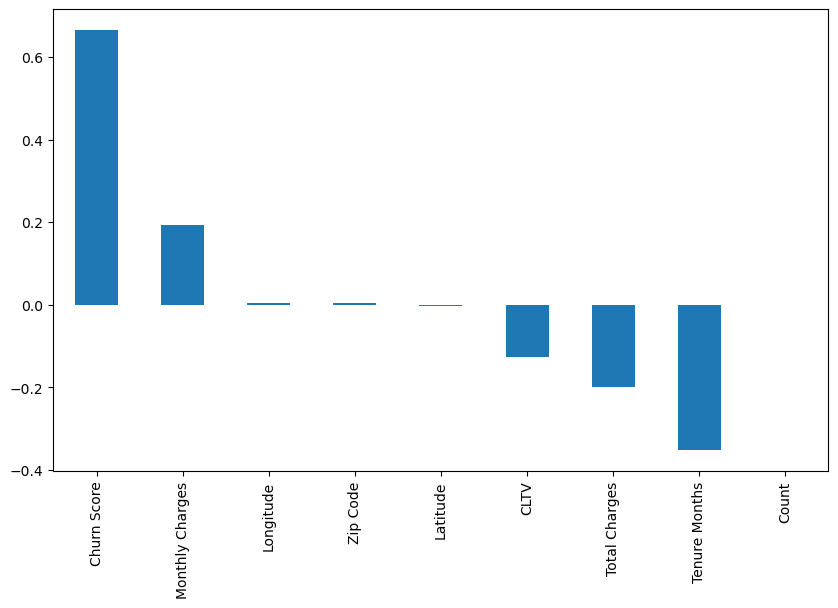

In [255]:
#bar plot of correlation between 'Churn Value' and numerical columns
plt.figure(figsize=(10, 6))
df[numerical_cols].corr()['Churn Value'].drop('Churn Value').sort_values(ascending=False).plot(kind='bar')

## 5.2 Pair Plot

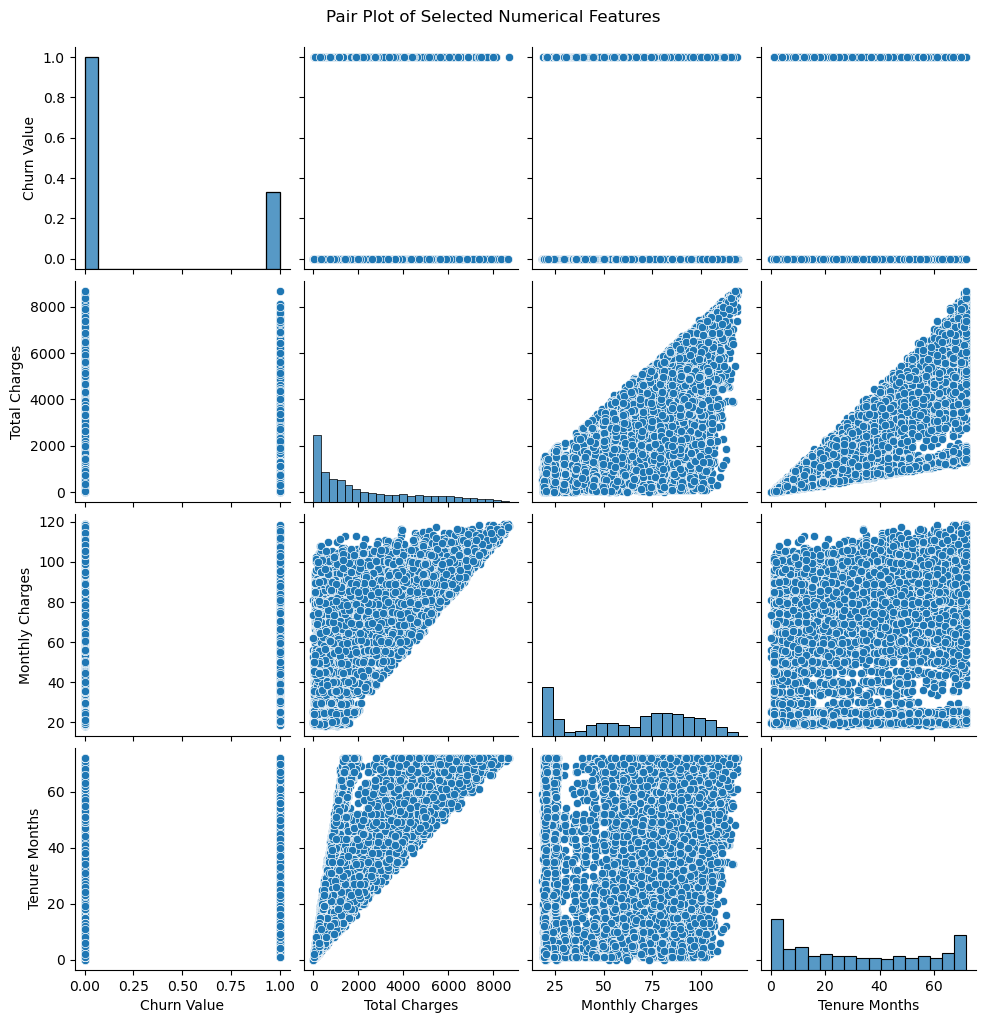

In [256]:
#pair plot of numerical columns
pair_plot = sns.pairplot(df[['Churn Value', 'Total Charges', 'Monthly Charges', 'Tenure Months']])
pair_plot.fig.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

## 5.3 Line Plot

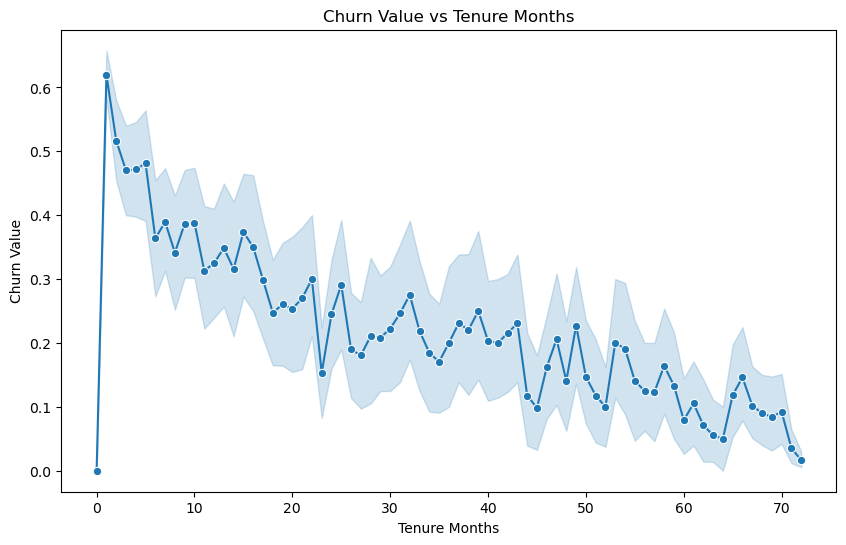

In [257]:
#line plot of 'Churn Value' vs 'Tenure Months'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Tenure Months', y='Churn Value', marker='o')
plt.title('Churn Value vs Tenure Months')
plt.xlabel('Tenure Months')
plt.ylabel('Churn Value')
plt.show()

Insights:
- There is a clear negative relationship: as Tenure Months increases, the Churn Value decreases.
- This indicates that newer customers are more likely to churn, while long-term customers tend to remain loyal.
- The decrease in Churn Value looks steeper for smaller Tenure Months (up to around 20 months), but gets flatter for larger Tenure Months.
- The plot suggests that Tenure Months is a strong predictor of Churn Value, but other factors may also have contribution.

## 5.4 Boxplot

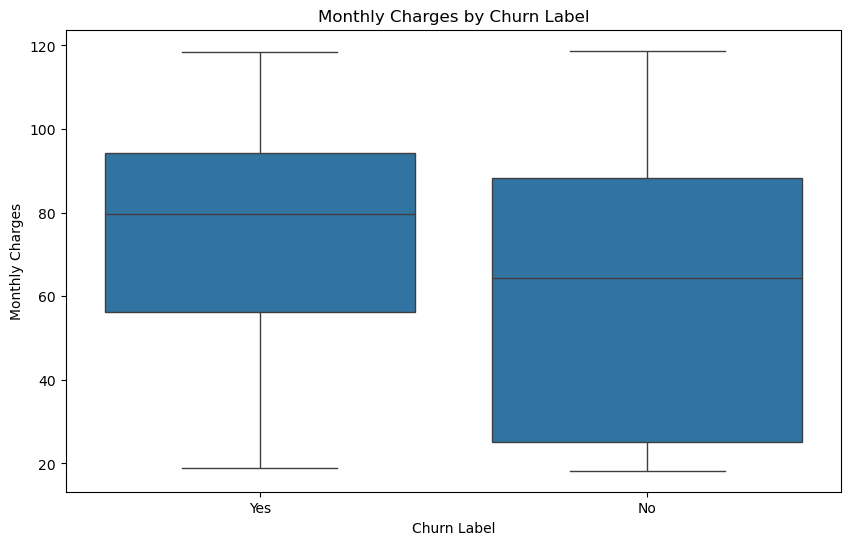

In [258]:
# use boxplot to visualise the relationship between 'Churn Label' and 'Monthly Charges'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn Label', y='Monthly Charges')
plt.title('Monthly Charges by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Monthly Charges')
plt.show()

Insights:
- Customers who churned have a higher median monthly charge aournd ~$80, compared to customers who stayed with a monthly charge around ~$65.
- Both groups share a similar maximum and minimum, but the lower quartile for churned customers is much higher at around ~$60 and ~$20 for non-churned customers.
- Churned customers are more concentrated toward the upper range around ~$60–$100, while non-churned customers show a wider spread, with many paying at the low end around ~$20–$40 as well as higher amounts.
- Thess suggest that churn is more common among higher-paying customers.

## 5.5 Barplots comparing categorical variables

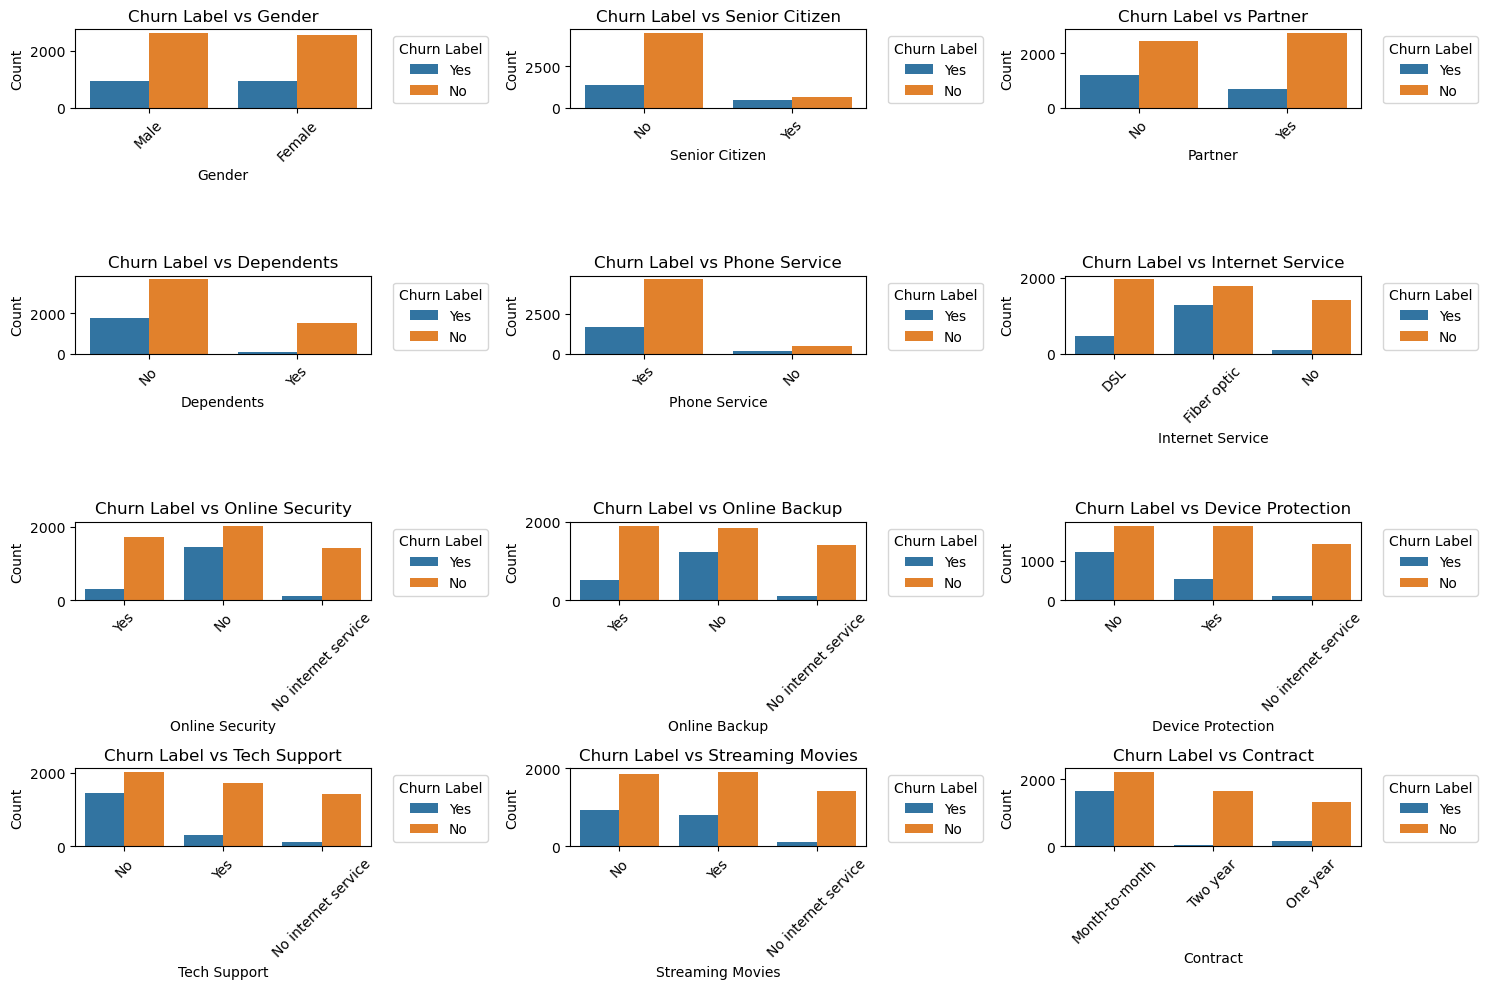

In [259]:
#to visualise the relationship between 'Churn Label' and other categorical columns including 'Gender', 'Senior Citizen', 'Partner', 'Phone Service', 'Internet Service', 'Contract'
plt.figure(figsize=(15, 10))
cat_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming Movies', 'Contract']
for i, col in enumerate(cat_cols):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Churn Label')
    plt.title(f'Churn Label vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
1. Gender
- Both male and female customers show a similar pattern: No-Churn is higher than Churn.
- There is no obvious difference between genders, suggesting that gender may not be a strong predictor of churn.
2. Senior Citizen
- Among non-senior customers, No-Churn is almost three times higher than Churn.
- Among senior customers, the gap between No-Churn and Churn is much smaller.
- This indicates that senior citizens are more likely to churn compared to younger customers.
3. Partner
- Customers with no partner have a No-Churn to Churn ratio of about 2:1.
- Customers with a partner show much stronger retention, with a ratio closer to 4:1.
- This suggests that having a partner may contribute to customer stability/loyalty.
4. Dependents
- Customers without dependents have a No-Churn to Churn ratio of about 2:1.
- Customers with dependents are far more likely to stay, with ratios greater than 10:1.
- This implies that customers with families or dependents are far less likely to churn.
5. Phone Service
- Both groups show higher No-Churn, having a No-Churn to Churn ratio of about 3:1.
- Phone service availability alone may not strongly differentiate customer churn.
6. Internet Service
- For DSL customers, No-Churn is almost four times higher than Churn.
- For fibre-optic customers, No-Churn is about 30% higher than Churn.
- For customer without internet service, No-Churn is about much higher than Churn.
- This suggests fiber-optic customers are much more likely to churn compared to DSL users.
7. Online Security
- The customres without online security have a much more higher churn than no-churn.
- This suggests providing online security feature may lower churn rates.
8. Online Backup
- The customres without online backup have a much more higher churn than no-churn.
- This suggests providing online backup feature may lower churn rates.
9. Device Protection
- The customres without device protection have a much more higher churn than no-churn.
- This suggests providing device protection feature may lower churn rates.
10. Tech Support
- For customers without tech support, No-Churn is about 30% higher than Churn.
- For customers with tech support, No-Churn is almost four times higher than Churn.
- This suggests providing tech support is strongly linked to lower churn rates.
11. Streaming Movies
- Customers with or without streaming movies both show a ratio of about 2:1.
- This suggests that streaming movies availability does not significantly affect churn.
12. Contract
- For customers with month-to-month contract, No-Churn is about 30% higher than Churn.
- For customer with one-year or two-year contract, No-Churn is significantly higher than Churn.
- This suggests that longer contracts strongly reduce churn probability.

## 5.6 Pie charts comparing categorical variables

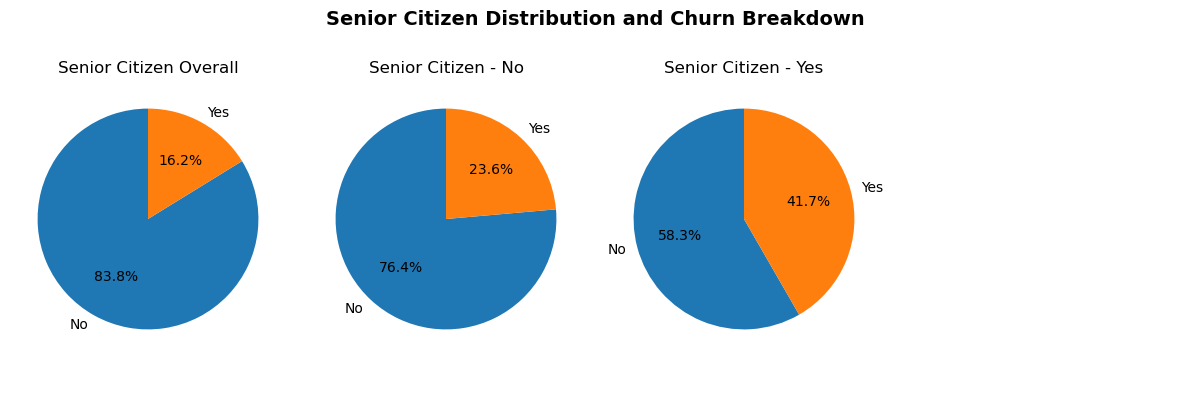

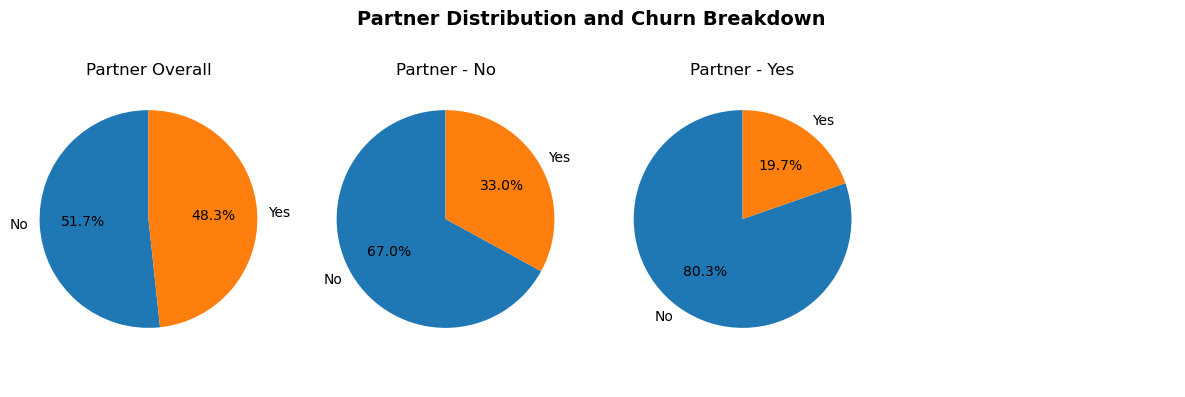

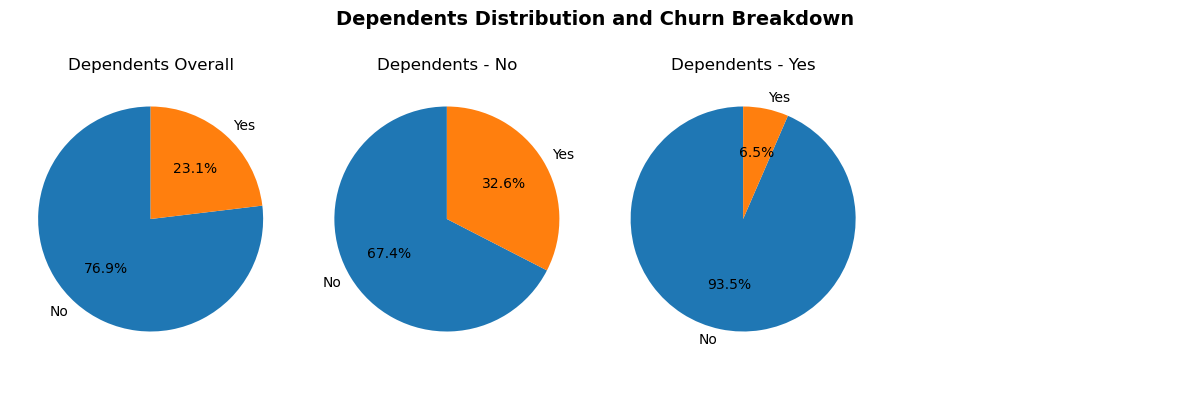

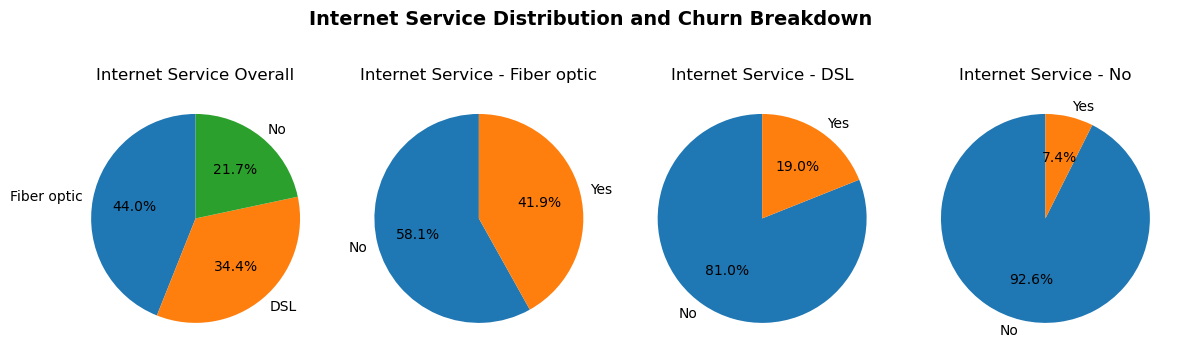

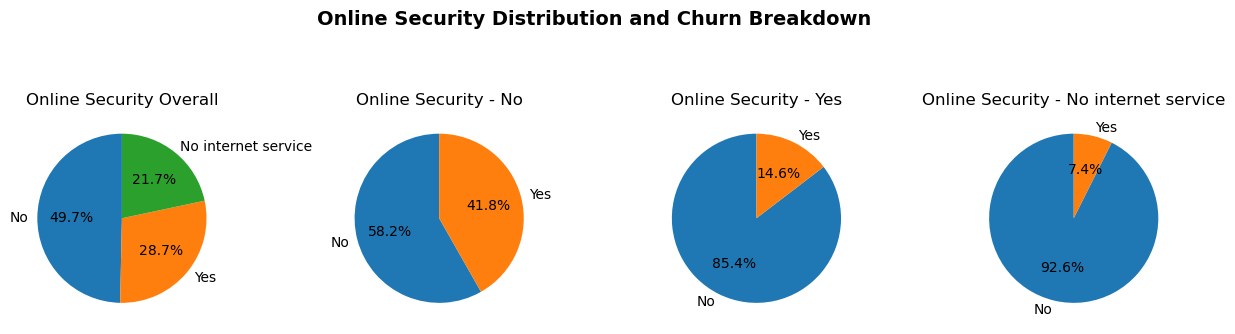

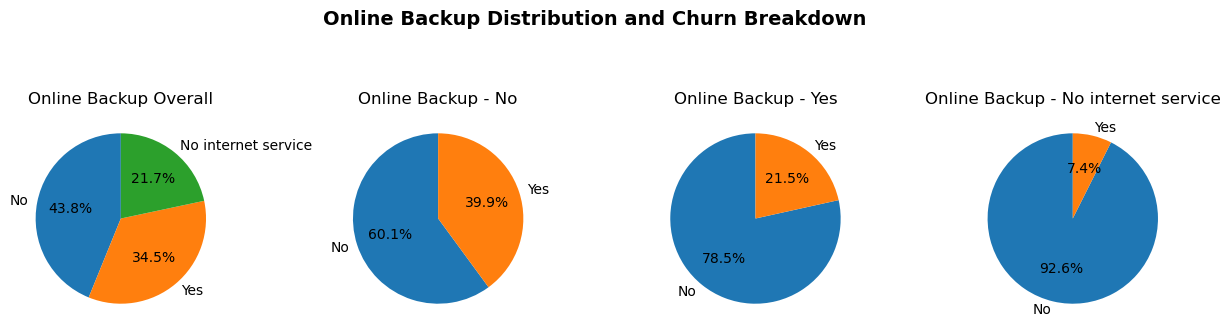

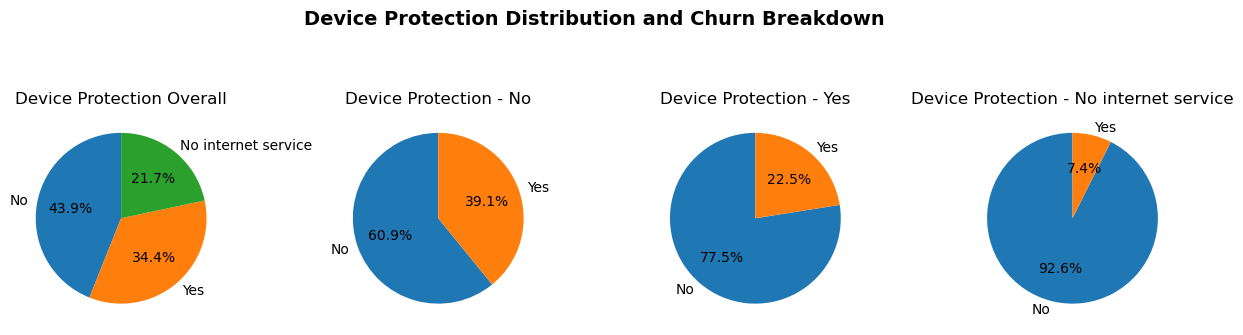

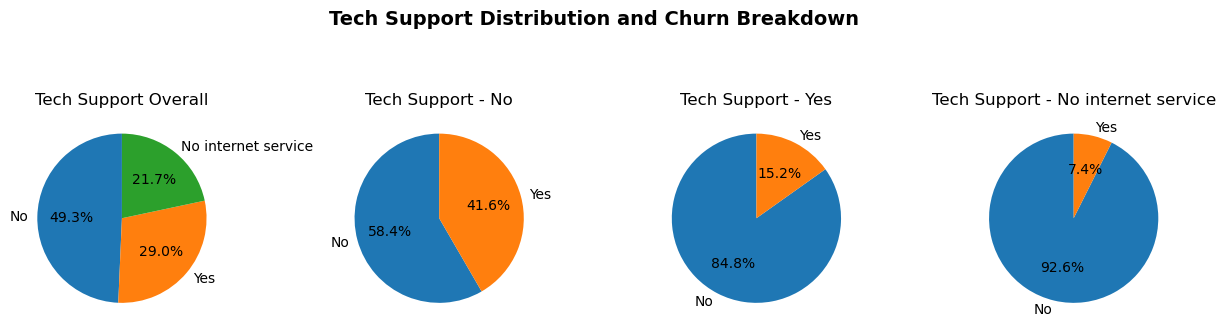

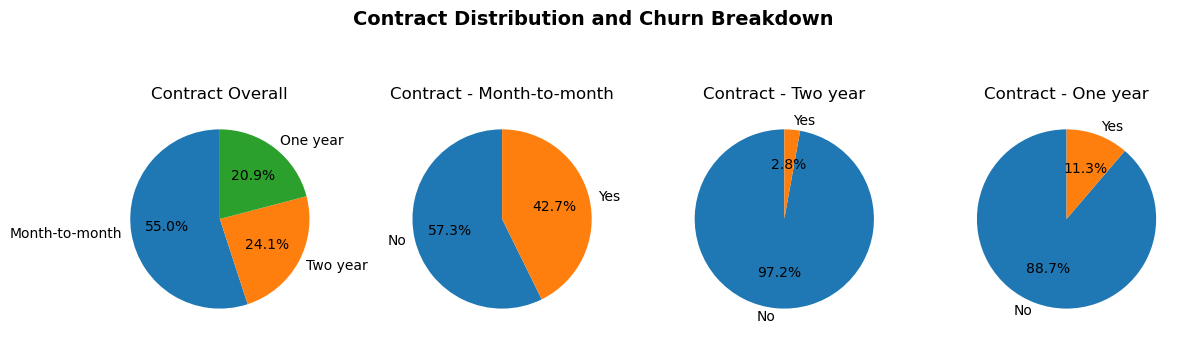

In [260]:
#pie charts
cat_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Contract']

for col in cat_cols:
    # create canvas: 1 row, 4 columns (overall, first category breakdown, second category breakdown)
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    fig.suptitle(f'{col} Distribution and Churn Breakdown', fontsize=14, fontweight='bold')

    # overall pie chart
    overall_counts = df[col].value_counts()
    axes[0].pie(overall_counts, labels=overall_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0].set_title(f'{col} Overall')

    # first category churn breakdown
    first_cat = overall_counts.index[0]
    first_counts = df[df[col] == first_cat]['Churn Label'].value_counts()
    axes[1].pie(first_counts, labels=first_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1].set_title(f'{col} - {first_cat}')

    # second category churn breakdown
    second_cat = overall_counts.index[1]
    second_counts = df[df[col] == second_cat]['Churn Label'].value_counts()
    axes[2].pie(second_counts, labels=second_counts.index, autopct='%1.1f%%', startangle=90)
    axes[2].set_title(f'{col} - {second_cat}')

    # third category churn breakdown if exists
    if len(overall_counts) > 2:
        third_cat = overall_counts.index[2]
        third_counts = df[df[col] == third_cat]['Churn Label'].value_counts()
        axes[3].pie(third_counts, labels=third_counts.index, autopct='%1.1f%%', startangle=90)
        axes[3].set_title(f'{col} - {third_cat}')
    else:
        axes[3].axis('off')

    plt.tight_layout()
    plt.show()

Further to the barplots comparing Customer Churn with some categorical variables, the above 9 pie charts show more details in the categorical variables which are likely to be strongly linked to our target variable - Customer Churn.

1. Senior Citizen: senior customers have a churn rate of 42%, while younger customers have a churn rate of 24%.
2. Partner: customers without partner have a churn rate of 33%, while customers with partner have a churn rate of 20%.
3. Dependents: customers without partner have a churn rate of 33%, while customers with partner have a churn rate of 7%.
4. Internet service: fibre-optic users have a churn rate of 42%, while DSL users have a churn rate of 19%, no-internet users have a a churn rate of 7%.
5. Online security: customers without Online security have a churn rate of 42%, while customers with Online security have a churn rate of 15%, no-internet users have a a churn rate of 7%.
6. Online backup: customers without Online backup have a churn rate of 40%, while customers with Online backup have a churn rate of 22%, no-internet users have a a churn rate of 7%.
7. Device protection: customers without Device protection have a churn rate of 39%, while customers with Device protection have a churn rate of 23%, no-internet users have a a churn rate of 7%.
8. Tech support: customers without tech support have a churn rate of 42%, while customers with tech support have a churn rate of 15%, no-internet users have a a churn rate of 7%.
9. Contract: month-to-month custmers have a churn rate of 43%, while customers with one-year contract have a churn rate of 11% and customers with two-year contract have a rate of 3%.

# 6. Potential quesitons to explore with the dataset?
1. Tenure and Churn
- Question: Does shorter customer tenure increase the likelihood of churn?
- Hypothesis: Customers with lower tenure months are significantly more likely to churn compared to long-term customers.

2. Monthly Charges and Churn
- Question: Do higher monthly charges increase the likelihood of churn?
- Hypothesis: Customers with higher monthly charges are more likely to churn.

3. Senior Citizens
- Question: Are senior citizens more prone to churn compared to non-senior customers?
- Hypothesis: Senior citizens have a higher churn rate than younger customers.

4. Family Status (Partner and Dependents)
- Question: Do customers with families (partners and/or dependents) churn less?
- Hypothesis: Customers with partners or dependents are significantly less likely to churn.

5. Internet Service Type
- Question: Does the type of internet service (DSL vs. Fiber optic) affect churn behavior?
- Hypothesis: Fiber-optic customers have higher churn rates than DSL customers.

6. Extra internet services like Online Security, Online Backup, Device Protection, Tech Support
- Question: Does bundling extra services with Internet make customers more loyal?
- Hypothesis: Customers with extra internet services are much less likely to churn than those without.

7. Contract Type
- Question: Does contract length influence churn probability?
- Hypothesis: Customers on month-to-month contracts are significantly more likely to churn than those on one- or two-year contracts.

8. Non-Predictive Factors
- Question: Do gender, phone service, or streaming TV significantly affect churn?
- Hypothesis: Gender, phone service, and streaming TV availability do not have a significant effect on churn rates.